# Load and prepare the data

In [4]:
import pandas as pd
import os

# List of fiLe paths
file_paths = [
    '../assets/data/AAPL_historical_data.csv',
    '../assets/data/AMZN_historical_data.csv',
    '../assets/data/GOOG_historical_data.csv',
    '../assets/data/MSFT_historical_data.csv',
    '../assets/data/META_historical_data.csv',
    '../assets/data/NVDA_historical_data.csv',
    '../assets/data/TSLA_historical_data.csv'
]

# Initialize an empty list to hold DataFrames
dataframes = []

# Loop through each file and load the data
for file_path in file_paths:
    # Load the current file
    df = pd.read_csv(file_path)
    
    # Ensure the required columns are present
    required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    missing_columns = [col for col in required_columns if col not in df.columns]
    
    if missing_columns:
        raise ValueError(f"Missing columns in {file_path}: {missing_columns}")
    
    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into one
combined_data = pd.concat(dataframes, ignore_index=True)

# Drop duplicates if any
combined_data.drop_duplicates(subset=['Date'], inplace=True)

# Sort by Date
combined_data.sort_values(by='Date', inplace=True)

# Reset the index after sorting
combined_data.reset_index(drop=True, inplace=True)

# Display the prepared data
print("Combined Data:")
print(combined_data.head())

# Save the combined data to a new CSV file if needed
combined_data.to_csv('../assets/result_data/combined_stock_data.csv', index=False)


Combined Data:
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Analysis Indicators with TA-Lib

Data with Indicators:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits    SMA_5    EMA_5  RSI_14  MACD  \
Date                                                                  
1980-12-12        0.0           0.0      NaN      NaN     NaN   NaN   
1980-12-15        0.0           0.0      NaN      NaN     NaN   NaN   
1980-12-16        0.0           0.0      NaN      NaN     NaN   NaN   
1980-12-17        0.0           0.0      NaN      NaN     NaN   NaN   
1980-12-18        0

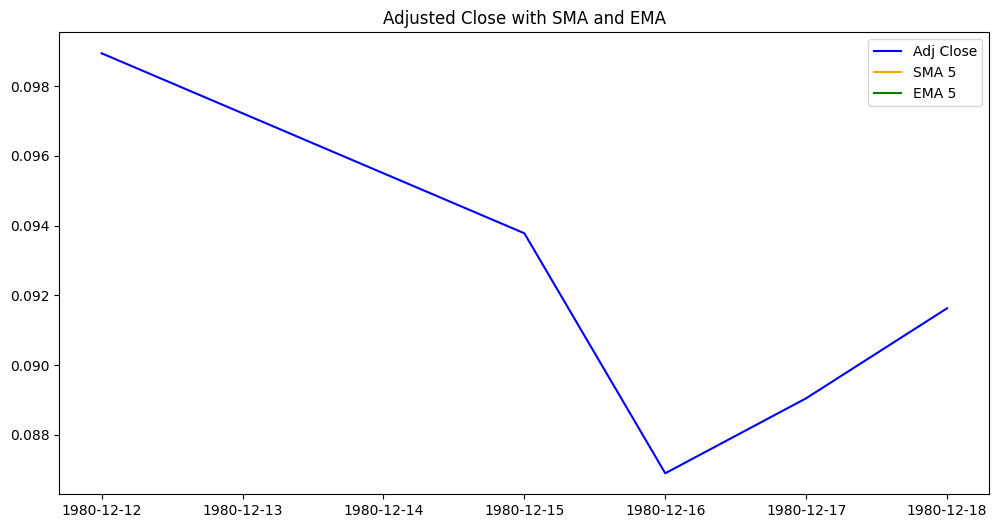

In [2]:
import pandas as pd
import talib
import matplotlib.pyplot as plt

# Create the Combined Data DataFrame
data = {
    'Date': ['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18'],
    'Open': [0.128348, 0.122210, 0.113281, 0.115513, 0.118862],
    'High': [0.128906, 0.122210, 0.113281, 0.116071, 0.119420],
    'Low': [0.128348, 0.121652, 0.112723, 0.115513, 0.118862],
    'Close': [0.128348, 0.121652, 0.112723, 0.115513, 0.118862],
    'Adj Close': [0.098943, 0.093781, 0.086898, 0.089049, 0.091630],
    'Volume': [469033600, 175884800, 105728000, 86441600, 73449600],
    'Dividends': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Stock Splits': [0.0, 0.0, 0.0, 0.0, 0.0]
}

df = pd.DataFrame(data)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate technical indicators using TA-Lib
# Simple Moving Average (SMA)
df['SMA_5'] = talib.SMA(df['Adj Close'], timeperiod=5)

# Exponential Moving Average (EMA)
df['EMA_5'] = talib.EMA(df['Adj Close'], timeperiod=5)

# Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Adj Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Display the resulting DataFrame
print("Data with Indicators:")
print(df)

# Plotting Adj Close and SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.plot(df.index, df['SMA_5'], label='SMA 5', color='orange')
plt.plot(df.index, df['EMA_5'], label='EMA 5', color='green')
plt.title('Adjusted Close with SMA and EMA')
plt.legend()
plt.show()


# PyNance for Financial Metrics